Nama     : **Muhamad Ilyas**               
Email    : **181240000831@unisnu.ac.id**   
Domisili : **Kabupaten Jepara, Jawa Tengah**

In [2]:
#memanggil file dari google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#ekstraksi file dataset zip
import os
import zipfile
local_zip = '/content/drive/MyDrive/Animal-Faces.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [4]:
#melihat direktori yang ada pada dataset
os.listdir('/content/Animal-Faces')

['train', 'val']

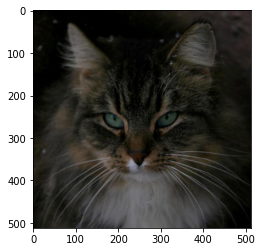

In [5]:
#melihat contoh gambar dari dataset
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/content/Animal-Faces/train/cat/flickr_cat_000002.jpg')
imgplot = plt.imshow(img)

In [7]:
#Meload data
base_dir = '/content/Animal-Faces/train'
train_dir = '/content/hasil/train'
validation_dir = '/content/hasil/val'

In [8]:
#install split folder
!pip install split-folders
import splitfolders

splitfolders.ratio(base_dir, output="hasil", seed=1337, ratio=(.8, .2), group_prefix=None)

Copying files: 14630 files [00:10, 1369.02 files/s]


In [9]:
#melihat gambar dari directory train
print('total train cat :', len(os.listdir('/content/Animal-Faces/train/cat')))
print('total train dog :', len(os.listdir('/content/Animal-Faces/train/dog')))
print('total train wild :', len(os.listdir('/content/Animal-Faces/train/wild')))

total train cat : 5153
total train dog : 4739
total train wild : 4738


In [10]:
#import Imagedatagenerator dan augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest',
    validation_split=0.2)

In [11]:
#Imagedatagenerator untuk train dan validasi
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training')
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 9363 images belonging to 3 classes.
Found 2340 images belonging to 3 classes.


In [12]:
#Arsitektur model
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  
])

In [13]:
#menentukan optimizer dan loss pada model
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
#memanggil Callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95):
      print("\nTraining sudah mencapai akurasi diatas 95%")
      self.model.stop_training = True
callbacks = myCallback()

In [15]:
#melatih model
num_epochs = 50
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=num_epochs,
                    steps_per_epoch = 60,
                    callbacks=[callbacks],
                    verbose=2,
                    batch_size=512)

Epoch 1/50
60/60 - 68s - loss: 1.2003 - accuracy: 0.3333 - val_loss: 1.0979 - val_accuracy: 0.3521
Epoch 2/50
60/60 - 67s - loss: 1.0929 - accuracy: 0.3729 - val_loss: 1.0941 - val_accuracy: 0.3239
Epoch 3/50
60/60 - 66s - loss: 1.0512 - accuracy: 0.4625 - val_loss: 1.0822 - val_accuracy: 0.3449
Epoch 4/50
60/60 - 66s - loss: 1.0596 - accuracy: 0.4750 - val_loss: 1.0653 - val_accuracy: 0.5030
Epoch 5/50
60/60 - 65s - loss: 1.0631 - accuracy: 0.4505 - val_loss: 0.9894 - val_accuracy: 0.5363
Epoch 6/50
60/60 - 69s - loss: 0.8499 - accuracy: 0.6208 - val_loss: 0.8612 - val_accuracy: 0.6269
Epoch 7/50
60/60 - 66s - loss: 0.7738 - accuracy: 0.6729 - val_loss: 0.8102 - val_accuracy: 0.6611
Epoch 8/50
60/60 - 65s - loss: 0.6014 - accuracy: 0.7708 - val_loss: 0.7294 - val_accuracy: 0.6923
Epoch 9/50
60/60 - 65s - loss: 0.6269 - accuracy: 0.7312 - val_loss: 0.8398 - val_accuracy: 0.6308
Epoch 10/50
60/60 - 65s - loss: 0.5896 - accuracy: 0.7563 - val_loss: 0.6183 - val_accuracy: 0.7577
Epoch 11/

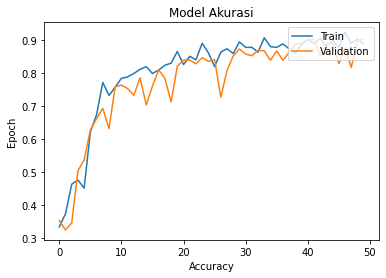

In [16]:
#membuat plot akurasi model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Akurasi")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(['Train', 'Validation'],loc="upper right")
plt.show()

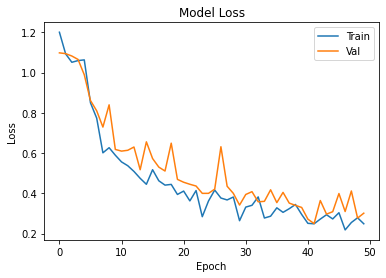

In [17]:
#membuat plot loss model
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train', 'Val'],loc="upper right")
plt.show()

Saving flickr_wild_000009.jpg to flickr_wild_000009.jpg
flickr_wild_000009.jpg
[2]
Predict : Wild


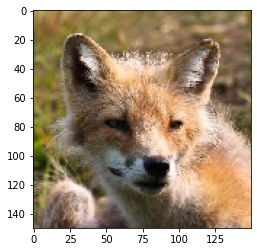

In [25]:
#meload gambar dan melakukan prediksi
from tensorflow.keras.models import load_model

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  predIdxs = np.argmax(classes, axis=1)
  
  print(fn)
  print(predIdxs)
  if classes[0, 0] != 0:
    print('Predict : Cat')
  elif classes[0, 0] != 0:
      print('Predict : Dog')
  else:
      print('Predict : Wild')

In [22]:
#mengubah model TensorFlow menjadi tflite (model TensorFlow yang sudah di training)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpuj8e2ihw/assets


In [23]:
#menyimpan model dalam format .tflite
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)